In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from PIL import Image

import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.datasets import make_regression
from skorch import NeuralNetRegressor

In [3]:
# original matrix X 
# X = random 10k x 10k (do smalelr if they dont work)
# 1k x 1k -> 5k x 5k

# generate num for number of rows and col based off of 20%(10-90 by 10) of the original # of r and c
    # Set amt, or based off of an arbitrary num, A, where num of rows/cols = A+(# of significant singular values)
# loop through rows/cols at indexes and place them into R and C arrays
   # data[[5,10,11],:]
    #   data[:,[5,10,11]]
   # row_idxs = np.random.choice(mat.shape[0], n, replace=replace)
# U, S, V are SVD of X matrix
# SVD of rows (Ur,Sr,Vr)
# SVD of cols (Uc, Sc, Vc)

# Multiply (Uc/Ur, S, Vr/Vc) depending on dimensions (cols of first = rows of second)
    # How to determine dimensions  (v of the rows, u of the cols)

# Repeat with S from model, compare

# repeat with high res image

In [4]:
def sample_mat(mat, n, replace=False, return_idxs=False):
    """Sample `n` random rows from mat.
    Returns an array of the rows sampled from the matrix.
    Arguments:
        mat {np.array} -- A matrix to sample rows from.
        n {int} -- The number of rows to sample.
    Keyword Arguments:
        replace {bool} -- Whether or not to sample with replacement. (default: {False})
        return_idxs {bool} -- Whether or not to return the indexes of the selected rows. (default: {False})
    Returns:
        np.array|tuple -- Returns a matrix containing the sampled rows, or if `return_idxs` is set,
            returns a tuple containing the indexes of the selected rows and the sampled matrix.
    """
    col_idxs = np.random.choice(mat.shape[0], n, replace=replace)
    sampled = mat[:, col_idxs]
    if return_idxs:
        return (col_idxs, sampled)
    return sampled

def sample_mat_row(mat, n, replace=False, return_idxs=False):
    """Sample `n` random rows from mat.
    Returns an array of the rows sampled from the matrix.
    Arguments:
        mat {np.array} -- A matrix to sample rows from.
        n {int} -- The number of rows to sample.
    Keyword Arguments:
        replace {bool} -- Whether or not to sample with replacement. (default: {False})
        return_idxs {bool} -- Whether or not to return the indexes of the selected rows. (default: {False})
    Returns:
        np.array|tuple -- Returns a matrix containing the sampled rows, or if `return_idxs` is set,
            returns a tuple containing the indexes of the selected rows and the sampled matrix.
    """
    col_idxs = np.random.choice(mat.shape[0], n, replace=replace)
    sampled = mat[col_idxs, :]
    if return_idxs:
        return (col_idxs, sampled)
    return sampled    

In [ ]:
# SVD -
# Ours - Uc @ predicted sigma @ Vr (theyre going to be just the regular U and V for smaller matrices)
# Poormans Uc @ (sampled sigma) @ (Vr)

# reconstruction error | X - Xr |
# plot with X as percent sampled from U and V
# plot another with x as percent of sigma sampled (0 everything after a certain percent)

In [5]:
X_mats = []
Xr_mats = []
for i in range(1000, 6000, 1000):
    m = i
    n = i

    X = np.random.normal(size=(m, n), scale=10)
    mat_rows = sample_mat_row(X, int(0.2*m))
    mat_cols = sample_mat(X, int(0.2*m))

    # SVD
    U, S, V = np.linalg.svd(X)
    Ur, Sr, Vr = np.linalg.svd(mat_rows)
    Uc, Sc, Vc = np.linalg.svd(mat_cols)

    for j in range(2, 32, 2): 
        S_s = S[0:j]  # zero out the rest
        Xr_s = (U @ np.diag(S_s) @ V)
        Xr = (U @ np.diag(S) @ V)

    # SVD -
    # Ours - Uc @ predicted sigma @ Vr
    # Poormans Uc @ (sampled sigma) @ (Vr)

    # reconstruction error | X - Xr |
    # plot with X as percent sampled from U and V
    # 10 times and make error bar for each percent error (lineplot errorbar)
    # plot another with x as percent of sigma sampled (0 everything after a certain percent)

    X_mats.append(X)
    Xr_mats.append(Xr_s)
    print(f'MSE for {m}x{n}: {mean_squared_error(Xr, X)}')
    print(f'MAE for {m}x{n}: {mean_absolute_error(Xr, X)}')
    print('-----------------------------------------------')


MSE for 1000x1000: 200.78850284400153
MAE for 1000x1000: 10.816112773306244
-----------------------------------------------
MSE for 2000x2000: 199.97543585024485
MAE for 2000x2000: 10.769446652944769
-----------------------------------------------
MSE for 3000x3000: 200.22380183764966
MAE for 3000x3000: 10.76552274952095
-----------------------------------------------
MSE for 4000x4000: 200.0538169296742
MAE for 4000x4000: 10.7546851146875
-----------------------------------------------
MSE for 5000x5000: inf
MAE for 5000x5000: 1.3309593474437368e+301
-----------------------------------------------


C:\Users\derek\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [6]:
npX = np.array(X_mats)
npXR = np.array(Xr_mats)
# can't get it to save as a 3x1000x1000 and only as a 3xobjects

<ipython-input-6-9eb644c792a0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  npX = np.array(X_mats)
<ipython-input-6-9eb644c792a0>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  npXR = np.array(Xr_mats)


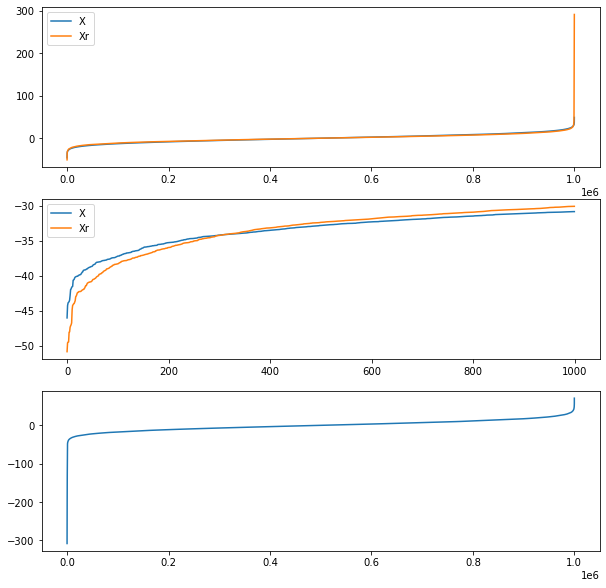

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

#for mat in range(3):
axs[0].plot(np.sort(npX[0].flatten()), label='X')
axs[0].plot(np.sort(npXR[0].flatten()), label='Xr')
axs[0].legend()

axs[1].plot(np.sort(npX[0].flatten())[0:1000], label='X')
axs[1].plot(np.sort(npXR[0].flatten())[0:1000], label='Xr')
axs[1].legend()

#axs[2].plot(np.sort(npX[0].flatten())[999900:100000], label='X')
#axs[2].plot(np.sort(npXR[0].flatten())[999900:100000], label='Xr')
#axs[2].legend()

axs[2].plot(np.sort(npX[0].flatten()-npXR[0].flatten()))

In [ ]:
# only end, theres huge spike that the true X doesnt reach

In [ ]:
# how to train the model for each 1000-1000 - 5000 for sigma (we prob dont have to since we're just testing whether
# poor mans svd works)
# Are the matrices of both poor-mans and regular svd constructed to become the same size? (both same nxn)
# can't get it to save as a 3x1000x1000 and only as a 3xobjects

# can neural nets take in different sizes than they were trained with